In [1]:
# Import all needed libraries and sublibraries

import tensorflow as tf

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Using TensorFlow backend.


In [2]:
# Import input (x) and output (y) data, and asign these to df1 and df2

df1 = pd.read_csv('X_data.csv')

df2 = pd.read_csv('Y_data.csv')

In [3]:
# Scale input data

df1 = preprocessing.scale(df1)

In [4]:
# Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data

X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [5]:
# Define a "shallow" neural network model using relu and sigmoid

model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [6]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history

history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])

history_dict=history.history

Epoch 00084: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

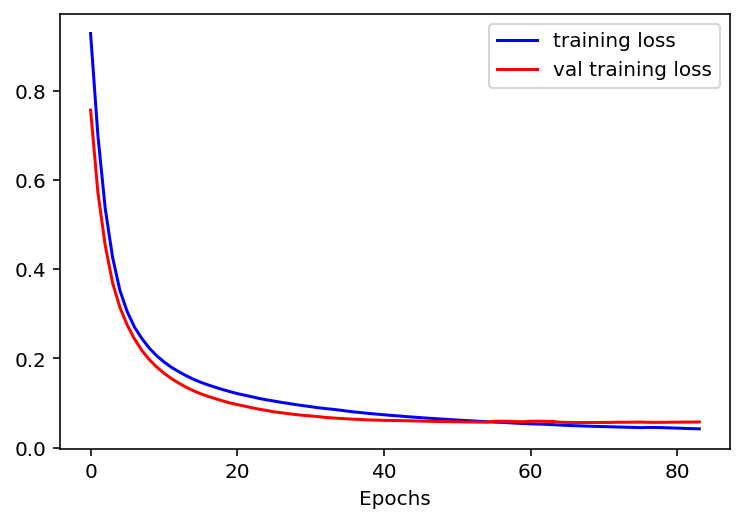

In [7]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

In [8]:
# Calculate loss and accuracy of testing data
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 61us/step
Test loss:  0.09546807826611034
Test accuracy:  0.9649122953414917


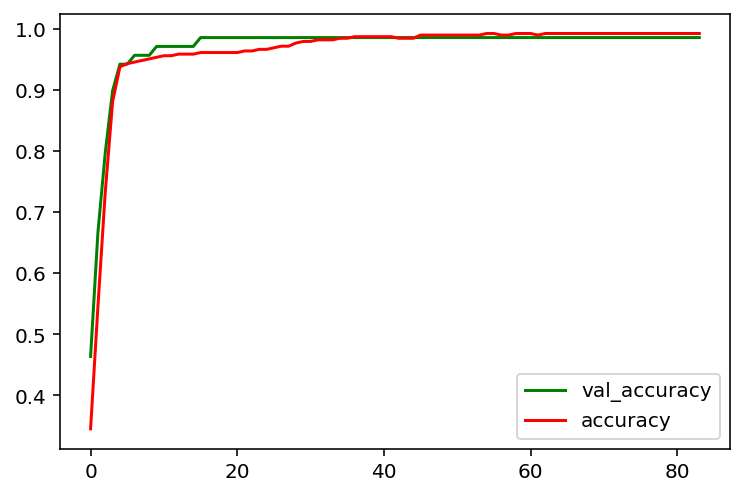

In [9]:
# Plot accuracy over the epochs

accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-g',label='val_accuracy')
plt.plot(accuracy_values,'-r',label='accuracy')
plt.legend()

In [10]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9940025252525253


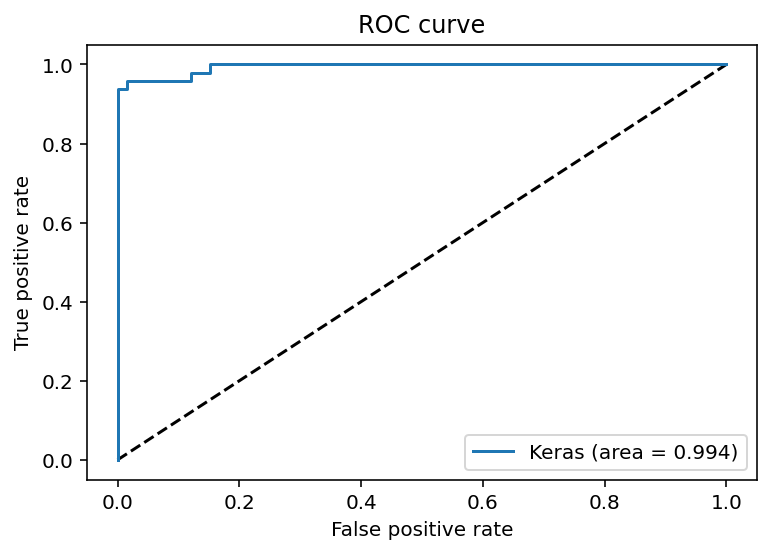

In [11]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [12]:
# AUC score of training data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train,y_train_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Training data AUC: ', auc_keras)

Training data AUC:  0.9979339278561339


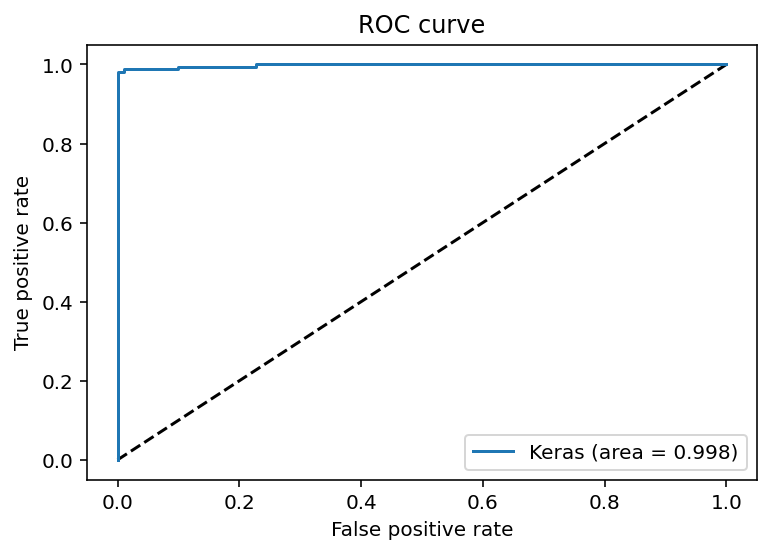

In [13]:
# ROC curve of training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [14]:
# Make y_train categorical and assign this to y_train_cat
y_train_cat = to_categorical(y_train)

In [15]:
#Define a "shallow" neural network model using relu and softmax + 1 neuron

model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])

In [16]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
history = model.fit(X_train, y_train_cat, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])

history_dict=history.history

Epoch 00518: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

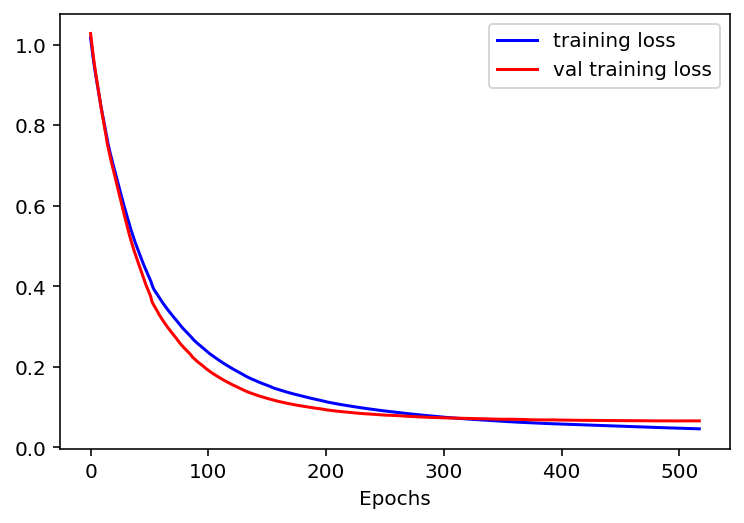

In [17]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

In [18]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 70us/step
Test loss:  0.10528540558982313
Test accuracy:  0.9649122953414917


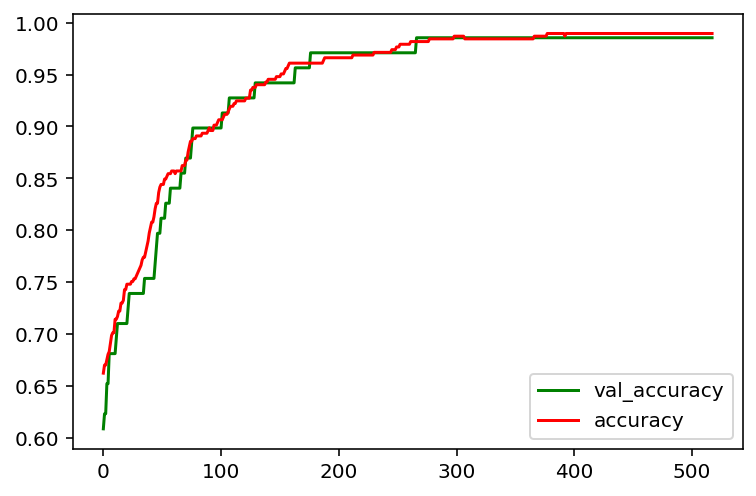

In [19]:
# Plot accuracy over the epochs

accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-g',label='val_accuracy')
plt.plot(accuracy_values,'-r',label='accuracy')
plt.legend()

In [20]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9936868686868687


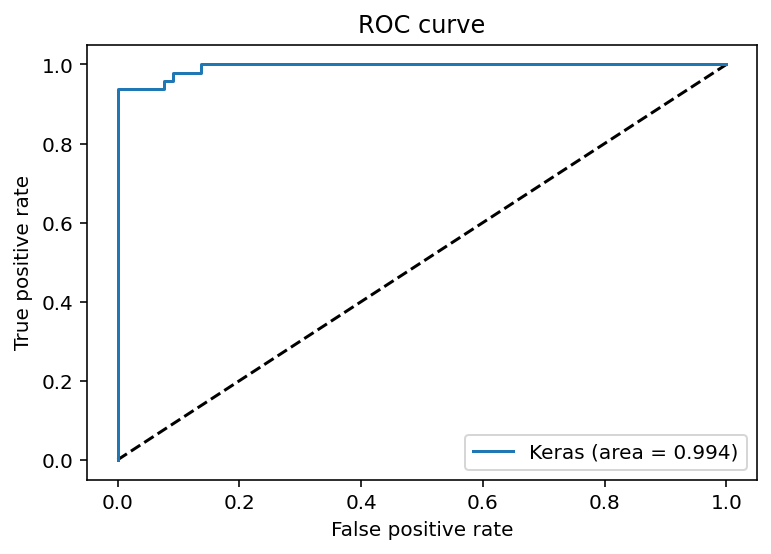

In [21]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [22]:
# AUC score of training data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9981869162819135


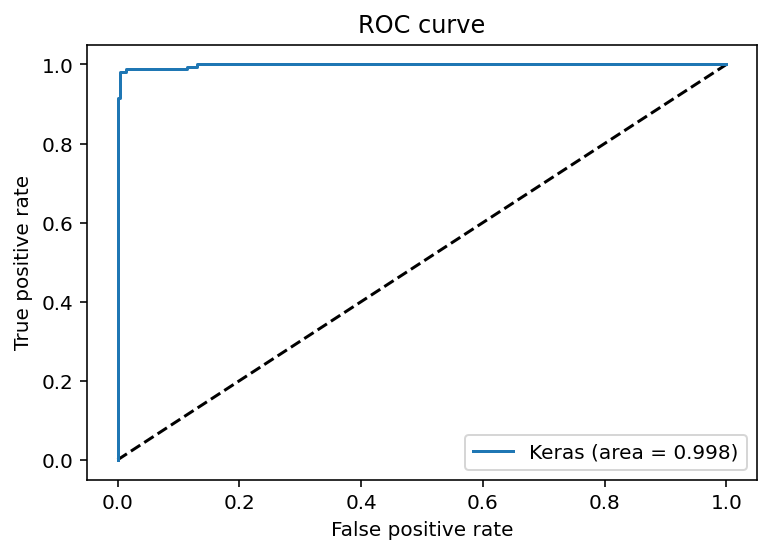

In [23]:
# ROC curve of training data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [24]:
# Define a "deep" neural network model using relu and softmax
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [25]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

Epoch 00051: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

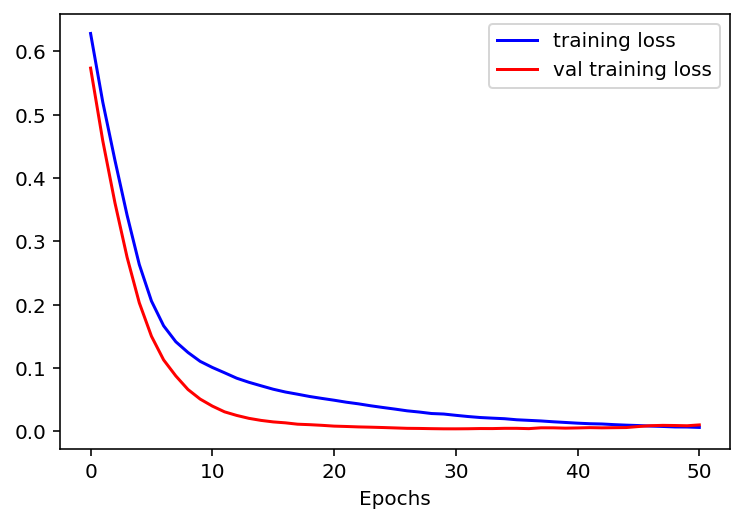

In [26]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

In [27]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 70us/step
Test loss:  0.18100735224914133
Test accuracy:  0.9736841917037964


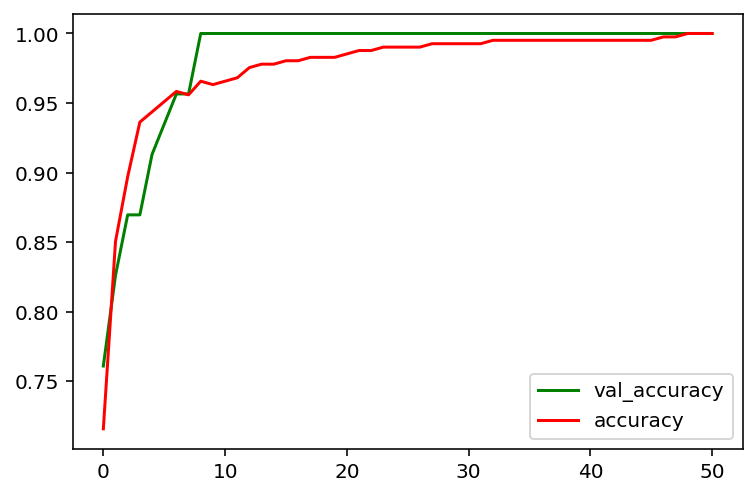

In [28]:
# Plot accuracy over the epochs

accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-g',label='val_accuracy')
plt.plot(accuracy_values,'-r',label='accuracy')
plt.legend()

In [29]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9810606060606061


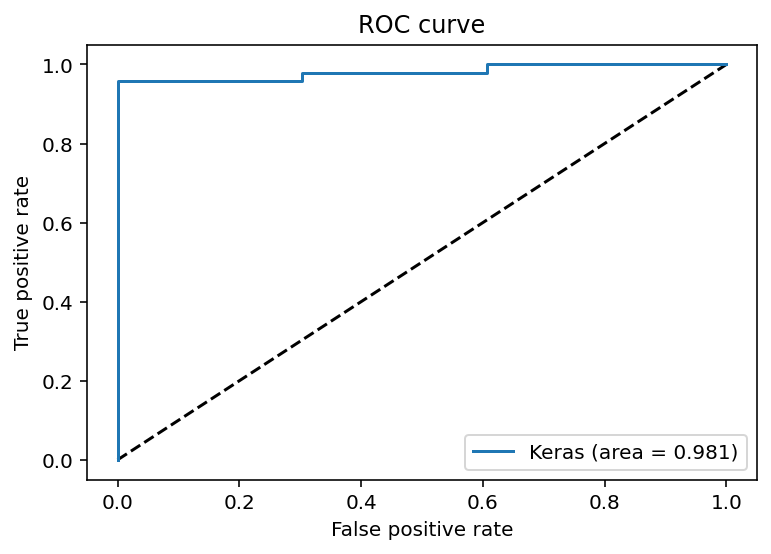

In [30]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [33]:
# AUC score of training data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  1.0


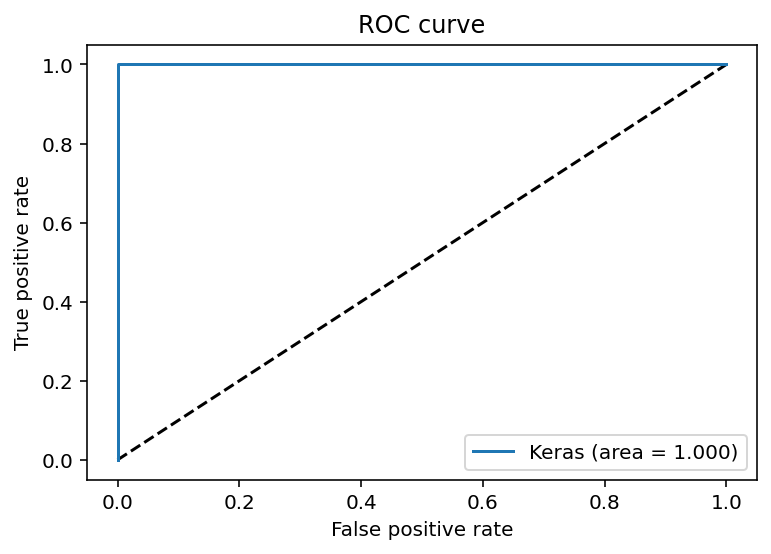

In [34]:
# ROC curve of training data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
###########################################################################################################################

In [ ]:
###########################################################################################################################

In [ ]:
###########################################################################################################################

In [35]:
# Define a "deep" neural network model using relu and softmax
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [36]:
# store the initial random weights
initial_weights = model.get_weights()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [38]:
train_sizes = (len(X_train) * np.linspace(0.1, 0.999, 4)).astype(int)
train_sizes

array([ 45, 181, 317, 453])

In [39]:
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = \
    train_test_split(X_train, y_train, train_size=train_size)
    # Make y_train_frac categorical and assign this to y_train_frac FIX THIS
    y_train_frac = to_categorical(y_train_frac)
    
    # Reset the weights of the model
    model.set_weights(initial_weights)
    
    h = model.fit(X_train_frac, y_train_frac,
                  verbose=0,
                  epochs=1000,
                  callbacks=[EarlyStopping(monitor='loss', patience=20)])

    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    train_scores.append(r[-1])
    
    y_test_cat = to_categorical(y_test)
    
    e = model.evaluate(X_test, y_test_cat, verbose=0)
    test_scores.append(e[-1])
    
    print("Done size: ", train_size)

Done size:  45
Done size:  181
Done size:  317
Done size:  453


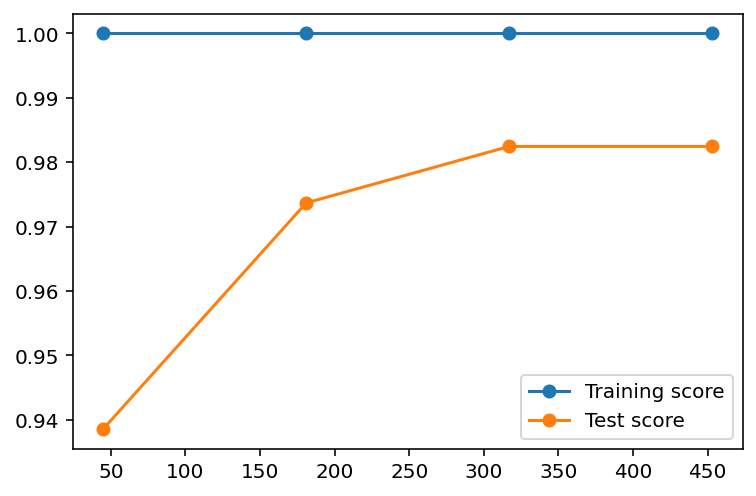

In [40]:
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.legend(loc="best")

In [43]:
# Dropout (no significant impact)

In [87]:
# Define a "deep" neural network model using relu and softmax + dropout
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [88]:
# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

Epoch 00051: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

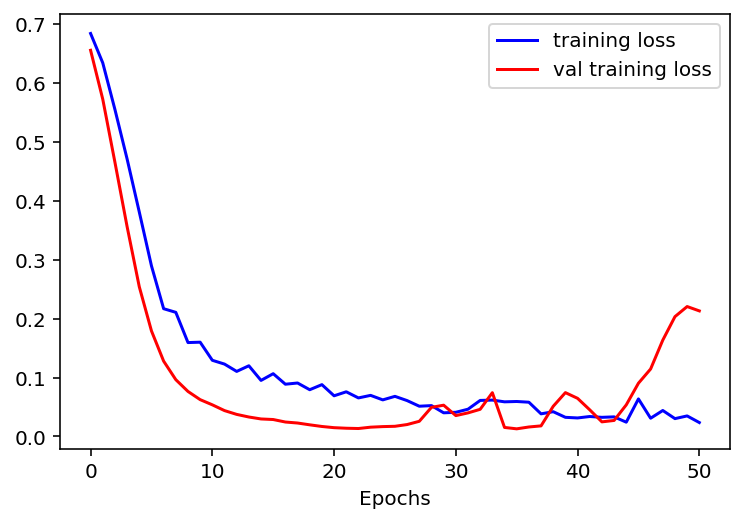

In [89]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

In [90]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 105us/step
Test loss:  0.17653510131334005
Test accuracy:  0.9561403393745422


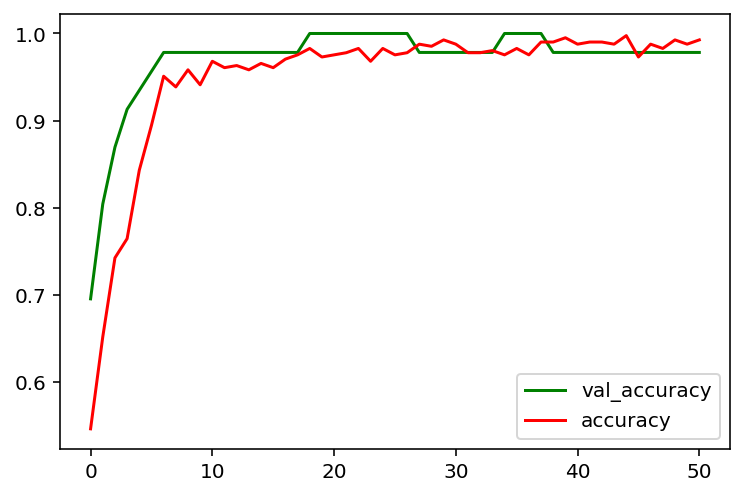

In [91]:
# Plot accuracy over the epochs

accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-g',label='val_accuracy')
plt.plot(accuracy_values,'-r',label='accuracy')
plt.legend()

In [49]:
# Batch normalization (no significant impact)

In [92]:
# Define a "deep" neural network model using relu and softmax + Batch Normalization
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(13, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(13, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(13, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [93]:
# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

Epoch 00065: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

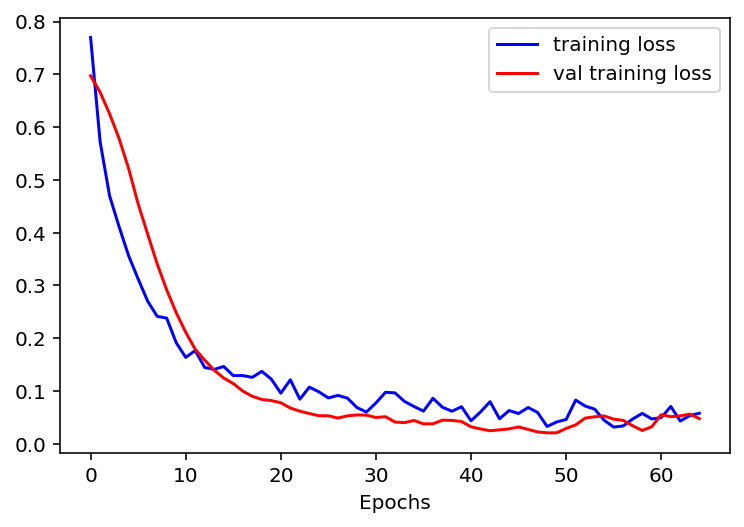

In [94]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

In [95]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 79us/step
Test loss:  0.16182833596279747
Test accuracy:  0.9561403393745422


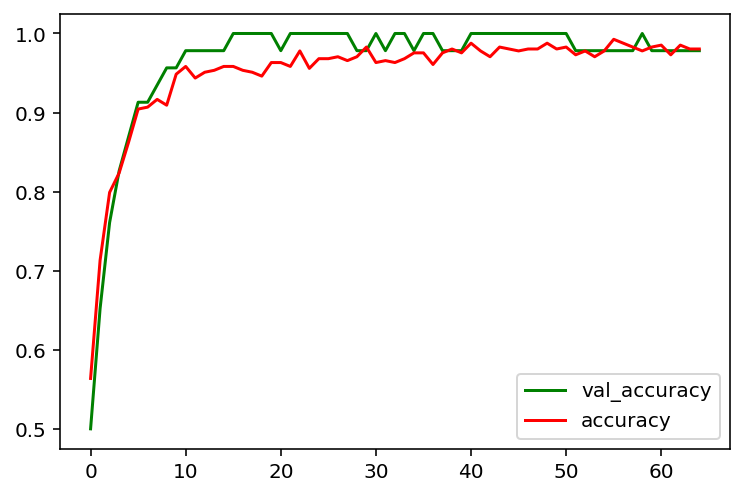

In [96]:
# Plot accuracy over the epochs

accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-g',label='val_accuracy')
plt.plot(accuracy_values,'-r',label='accuracy')
plt.legend()

In [55]:
# Weight regularization (actually has an adverse effect on perfomance)

In [97]:
# Define a "deep" neural network model using relu and softmax  +  Kernel regularization
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(13, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(13, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(13, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [98]:
# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

Epoch 00038: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

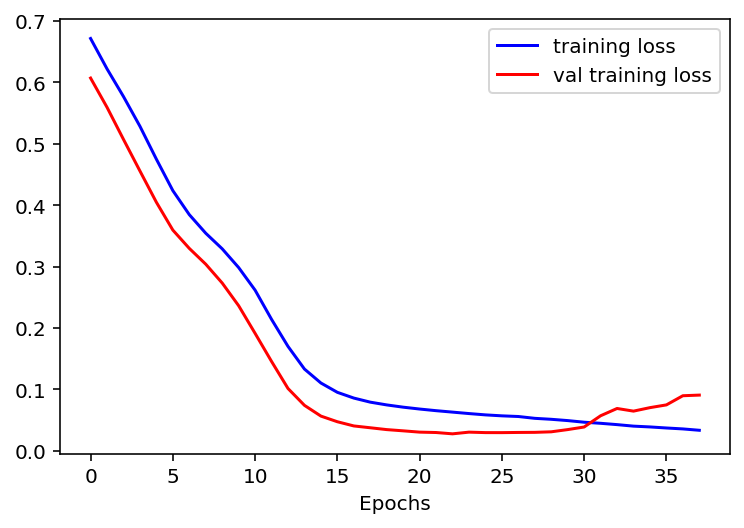

In [99]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

In [100]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 96us/step
Test loss:  0.2184207716531921
Test accuracy:  0.9561403393745422


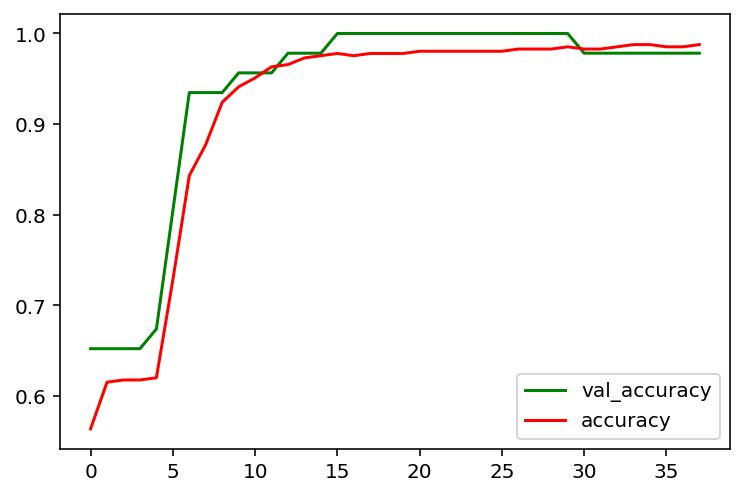

In [101]:
# Plot accuracy over the epochs

accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-g',label='val_accuracy')
plt.plot(accuracy_values,'-r',label='accuracy')
plt.legend()